# 1. Data Preprocessing

# (1) Reading the Training, the Development and the Testing Datasets 

In [1]:
import pandas as pd
from os import listdir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory1 = 'data/train'
paths1 = listdir(directory1)
paths1.sort()
paths1

['anger-ratings-0to1.train.txt',
 'fear-ratings-0to1.train.txt',
 'joy-ratings-0to1.train.txt',
 'sadness-ratings-0to1.train.txt']

In [3]:
train_anger = pd.read_csv('%s/%s' %(directory1,paths1[0]), delimiter='\t',header=None)
train_anger.head()

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
train_anger.columns = ['SentID', 'Tweet', 'Emotion', 'Rating']
train_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


In [5]:
train_fear = pd.read_csv('%s/%s' %(directory1,paths1[1]), delimiter='\t',header=None)
train_fear.columns = train_anger.columns

train_joy = pd.read_csv('%s/%s' %(directory1,paths1[2]), delimiter='\t',header=None) 
train_joy.columns = train_anger.columns

train_sadness = pd.read_csv('%s/%s' %(directory1,paths1[3]), delimiter='\t',header=None) 
train_sadness.columns = train_anger.columns

In [6]:
# check if there are any duplicates(subset = all of the columns)

assert train_fear.duplicated().sum() == 0
assert train_anger.duplicated().sum() == 0
assert train_joy.duplicated().sum() == 0
assert train_sadness.duplicated().sum() == 0

In [7]:
# checking missing data & len(train),len(test)
print(train_anger.info(), train_fear.info(), train_joy.info(), train_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   857 non-null    int64  
 1   Tweet    857 non-null    object 
 2   Emotion  857 non-null    object 
 3   Rating   857 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1147 entries, 0 to 1146
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   1147 non-null   int64  
 1   Tweet    1147 non-null   object 
 2   Emotion  1147 non-null   object 
 3   Rating   1147 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   823 non-null  

In [8]:
print(train_anger.describe(), "\n", train_fear.describe(), "\n", train_joy.describe(), "\n", train_sadness.describe() )

             SentID      Rating
count    857.000000  857.000000
mean   10428.000000    0.496475
std      247.538886    0.169169
min    10000.000000    0.067000
25%    10214.000000    0.375000
50%    10428.000000    0.479000
75%    10642.000000    0.604000
max    10856.000000    0.938000 
              SentID       Rating
count   1147.000000  1147.000000
mean   20573.000000     0.495579
std      331.254686     0.194792
min    20000.000000     0.062000
25%    20286.500000     0.354000
50%    20573.000000     0.479000
75%    20859.500000     0.625000
max    21146.000000     0.979000 
             SentID      Rating
count    823.00000  823.000000
mean   30411.00000    0.492618
std      237.72393    0.204334
min    30000.00000    0.019000
25%    30205.50000    0.340000
50%    30411.00000    0.480000
75%    30616.50000    0.646000
max    30822.00000    0.980000 
              SentID      Rating
count    786.000000  786.000000
mean   40392.500000    0.495957
std      227.042947    0.190841
mi

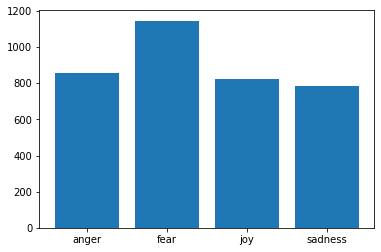

In [9]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_train = [train_anger.shape[0], train_fear.shape[0], train_joy.shape[0], train_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_train,tick_label=labels)
plt.show()

In [10]:
directory2 = 'data/dev'
paths2 = listdir(directory2)
paths2.sort()
paths2

dev_anger = pd.read_csv('%s/%s' %(directory2,paths2[0]), delimiter='\t',header=None)
dev_anger.columns = train_anger.columns
dev_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
5,10862,Sometimes I get mad over something so minuscul...,anger,0.646
6,10863,I think @Sam_Canaday &amp; @KYLEJDOWSON must a...,anger,0.250
7,10864,My eyes have been dilated. I hate the world ri...,anger,0.812
8,10865,@huwellwell One chosen by the CLP members! MP ...,anger,0.682
9,10866,@huwellwell One chosen by the CLP members! MP ...,anger,0.438


In [11]:
dev_fear = pd.read_csv('%s/%s' %(directory2,paths2[1]), delimiter='\t',header=None)
dev_fear.columns = train_anger.columns

dev_joy = pd.read_csv('%s/%s' %(directory2,paths2[2]), delimiter='\t',header=None) 
dev_joy.columns = train_anger.columns

dev_sadness = pd.read_csv('%s/%s' %(directory2,paths2[3]), delimiter='\t',header=None) 
dev_sadness.columns = train_anger.columns

In [12]:
# check if there are any duplicates(subset = all of the columns)

assert dev_fear.duplicated().sum() == 0
assert dev_anger.duplicated().sum() == 0
assert dev_joy.duplicated().sum() == 0
assert dev_sadness.duplicated().sum() == 0

In [13]:
# checking missing data & len(train),len(test)
print(dev_fear.info(), dev_fear.info(), dev_joy.info(), dev_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   110 non-null    int64  
 1   Tweet    110 non-null    object 
 2   Emotion  110 non-null    object 
 3   Rating   110 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   79 non-null     int6

In [14]:
print(dev_anger.describe(), "\n", dev_fear.describe(), "\n", dev_joy.describe(), "\n", dev_sadness.describe() )

             SentID     Rating
count     84.000000  84.000000
mean   10898.500000   0.489607
std       24.392622   0.156768
min    10857.000000   0.125000
25%    10877.750000   0.410250
50%    10898.500000   0.500000
75%    10919.250000   0.590500
max    10940.000000   0.860000 
              SentID      Rating
count    110.000000  110.000000
mean   21201.500000    0.489309
std       31.898276    0.185675
min    21147.000000    0.060000
25%    21174.250000    0.354000
50%    21201.500000    0.466500
75%    21228.750000    0.632500
max    21256.000000    0.896000 
              SentID     Rating
count     79.000000  79.000000
mean   30862.000000   0.483392
std       22.949219   0.219682
min    30823.000000   0.038000
25%    30842.500000   0.312000
50%    30862.000000   0.479000
75%    30881.500000   0.653000
max    30901.000000   0.936000 
              SentID     Rating
count     74.000000  74.000000
mean   40822.500000   0.475743
std       21.505813   0.178436
min    40786.000000   0.

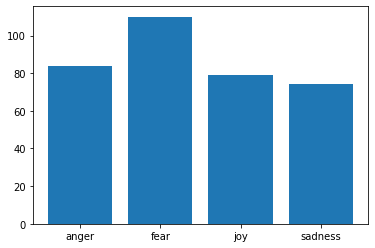

In [15]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_dev = [dev_anger.shape[0], dev_fear.shape[0], dev_joy.shape[0], dev_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_dev,tick_label=labels)
plt.show()

In [16]:
directory3 = 'data/test'
paths3 = listdir(directory3)
paths3.sort()
paths3

test_anger = pd.read_csv('%s/%s' %(directory3,paths3[0]), delimiter='\t',header=None)
test_anger.columns = train_anger.columns

test_anger[:10]

,SentID,Tweet,Emotion,Rating
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


In [17]:
test_fear = pd.read_csv('%s/%s' %(directory3,paths3[1]), delimiter='\t',header=None)
test_fear.columns = train_anger.columns

test_joy = pd.read_csv('%s/%s' %(directory3,paths3[2]), delimiter='\t',header=None) 
test_joy.columns = train_anger.columns

test_sadness = pd.read_csv('%s/%s' %(directory3,paths3[3]), delimiter='\t',header=None) 
test_sadness.columns = train_anger.columns

In [18]:
# check if there are any duplicates(subset = all of the columns)

assert test_fear.duplicated().sum() == 0
assert test_anger.duplicated().sum() == 0
assert test_joy.duplicated().sum() == 0
assert test_sadness.duplicated().sum() == 0

In [19]:
# checking missing data & len(train),len(test)
print(test_anger.info(), test_fear.info(), test_joy.info(), test_sadness.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   760 non-null    int64  
 1   Tweet    760 non-null    object 
 2   Emotion  760 non-null    object 
 3   Rating   760 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   995 non-null    int64  
 1   Tweet    995 non-null    object 
 2   Emotion  995 non-null    object 
 3   Rating   995 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   714 non-null    

In [20]:
print(test_anger.describe(), "\n", test_fear.describe(), "\n", test_joy.describe(), "\n", test_sadness.describe() )

             SentID      Rating
count    760.000000  760.000000
mean   11320.500000    0.502149
std      219.537392    0.171886
min    10941.000000    0.032000
25%    11130.750000    0.375000
50%    11320.500000    0.496000
75%    11510.250000    0.625000
max    11700.000000    0.976000 
             SentID     Rating
count    995.00000  995.00000
mean   21754.00000    0.50247
std      287.37606    0.20094
min    21257.00000    0.06200
25%    21505.50000    0.35400
50%    21754.00000    0.50000
75%    22002.50000    0.64600
max    22251.00000    1.00000 
              SentID      Rating
count    714.000000  714.000000
mean   31258.500000    0.508958
std      206.258333    0.217295
min    30902.000000    0.000000
25%    31080.250000    0.340000
50%    31258.500000    0.500000
75%    31436.750000    0.673000
max    31615.000000    0.980000 
             SentID      Rating
count    673.00000  673.000000
mean   41196.00000    0.511272
std      194.42265    0.202737
min    40860.00000    0.

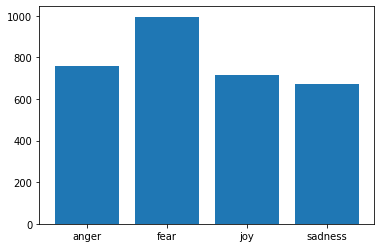

In [21]:
# check the counts of observations in each categorical bin using bars (to see if we need data balance.)
d_test = [test_anger.shape[0], test_fear.shape[0], test_joy.shape[0], test_sadness.shape[0]]
labels= ["anger", "fear", "joy", "sadness"]
plt.bar(labels, d_test,tick_label=labels)
plt.show()

In [22]:
# show the number of instances in the Tweet Emotion Intensity dataset.

Table_1 = pd.DataFrame(np.array([(d_train), (d_dev), (d_test)])).T
Table_1.columns = ['Train', 'Dev.', 'Test']
Table_1.index = ['anger', 'fear', 'joy', 'sadness']
Table_1['All'] = Table_1.apply(lambda x: x.sum(), axis=1)
Table_1.loc['All'] = Table_1.apply(lambda x: x.sum())

Table_1

,Train,Dev.,Test,All
anger,857,84,760,1701
fear,1147,110,995,2252
joy,823,79,714,1616
sadness,786,74,673,1533
All,3613,347,3142,7102


# (2) Define Text Data Cleaning Process

In [23]:
import string
import re

from nltk.corpus import stopwords

import wordsegment as ws # $ pip install wordsegment    
ws.load()     

import emoji  # $ pip install emoji

# As the glove model contains many words made with grammatical role, tense ,or derivational morphology,
# we do not need WordNetLemmatizer or SnowballStemmer here.

In [24]:
def normalize_text(text):
   
    
    # prepare spaces between punctuation and words
    text1 = text.split('...')
    for i in range(len(text1)):
        text1[i] = text1[i].replace('/',' / ').replace('\\',' \ ').replace(',',' , ').replace('.',' . ').replace('?',' ? ').replace('!',' ! ').replace("'"," ' ").replace(':',' : ').replace(';',' ; ').replace('-',' - ').replace('(',' ( ').replace(')',' ) ').replace('[',' [ ').replace(']',' ] ').replace('&',' & ').replace('*',' * ').replace('{',' { ').replace('}',' } ').replace('-',' - ').replace('`',' ` ').replace('"',' " ').replace('>','> ').replace('<',' <')
    text1 = ' '.join(text1)
    
    # split into tokens by white space
    tokens = text1.split()
    
    return tokens

def clean_text(text):
   
    tokens = normalize_text(text)
   
    
    # make lower case
    tokens = [word.lower() for word in tokens]
    
    
    clean_text = ' '.join(tokens)
    tokens = clean_text.split()
    
   # filter out short tokens

    tokens = [word for word in tokens if len(word) > 1]
    
    return ' '.join(tokens)

tokens = normalize_text("@aa   bb #nothappy ab,")
print(tokens)
new_tokens = list()
for w in tokens:
    
    if w == "<user>":
        w = w
    elif w == "<url>":
        w = w
    elif w == "<number>":
        w = w
    else:
        # prepare regex for char filtering: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
        re_punc = re.compile('[%s]' %re.escape(string.punctuation))
        # remove punctuation from each word
        w = re_punc.sub('', w) 
        # remove remaining tokens that are not alphabetic
        if w.isalpha():
            w = w
    new_tokens.append(w)        
    
print(new_tokens)

tokens = normalize_text("@aa   bb #nothappy ab,")
print(tokens)
new_tokens = list()
for w in tokens:
    
    if w == "<user>":
        w = w
    elif w == "<url>":
        w = w
    elif w == "<number>":
        w = w
    else:
        # prepare regex for char filtering: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
        re_punc = re.compile('[%s]' %re.escape(string.punctuation))
        # remove punctuation from each word
        w = re_punc.sub('', w) 
        # remove remaining tokens that are not alphabetic
        if w.isalpha():
            w = w
    new_tokens.append(w)        
    
print(new_tokens)

new_tokens1 = ["  "]
tokens = [word for word in new_tokens1 if len(word) > 1]
tokens = [re.sub(r'\s+','',word) for word in tokens]
print(tokens)
len(tokens[0])

tokens = ["<user>", "<url>","number>", "a", "b", "newera"]
new_tokens2 = []
for w in tokens:
    if w == "<user>":
        w = w
        new_tokens2.append(w)
    elif w == "<url>":
        w = w
        new_tokens2.append(w)
        
    elif w == "<number>":
        w = w
        new_tokens2.append(w)
    
    else:
        # word segment will convert the hashtag based joined words, for example, it will segment #iamthebest to ['i','am','the','best']
        w1 = ' '.join(ws.segment(w)) 
    new_tokens2 += w1.split()
    
new_tokens2

b = ["a", "b"]
a = ws.segment("newworld")
b += (" ".join(a)).split()
b

c = ['a', 'b', 'new world']
c = ' '.join(c)
c.split()

# 2. Text Data Preparation（Feature Extraction)

# (1) Load Twitter Pretrained Vectors (Glove)

In [25]:
import numpy as np

In [26]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'UTF-8')
    model = {}
    num = 1
    for line in f:
        try:
            splitLine = line.split()
            word = splitLine[0]
            coefs = np.asarray(splitLine[1:], dtype = 'float32')
            model[word] = coefs
            num += 1
        except Exception as e:
            print("Failed at line " + str(num))
    print("Done. Found %s word vectors." %len(model)," words loaded!")
    return model

In [27]:
# To download the pretrained glove model (2B tweets, 27B tokens) - [https://nlp.stanford.edu/projects/glove/   glove.twitter.27B.zip]
# choose glove.twitter.27B.100d.txt from glove.twitter.27B.zip. [100-dimension vectors]

word_vector_path = "files/wv_models/"
wv_model_path = word_vector_path + "glove.twitter.27B.100d.txt"

wv_model_g = loadGloveModel(wv_model_path)


Loading Glove Model
Done. Found 1193514 word vectors.  words loaded!


# (3) Extract Feature with Glove

# 1) Clean Text Data

In [28]:
train_anger['Tweet'] = train_anger['Tweet'].apply(clean_text)
train_fear['Tweet'] = train_fear['Tweet'].apply(clean_text)
train_joy['Tweet'] = train_joy['Tweet'].apply(clean_text)
train_sadness['Tweet'] = train_sadness['Tweet'].apply(clean_text)

dev_anger['Tweet'] = dev_anger['Tweet'].apply(clean_text)
dev_fear['Tweet'] = dev_fear['Tweet'].apply(clean_text)
dev_joy['Tweet'] = dev_joy['Tweet'].apply(clean_text)
dev_sadness['Tweet'] = dev_sadness['Tweet'].apply(clean_text)

test_anger['Tweet'] = test_anger['Tweet'].apply(clean_text)
test_fear['Tweet'] = test_fear['Tweet'].apply(clean_text)
test_joy['Tweet'] = test_joy['Tweet'].apply(clean_text)
test_sadness['Tweet'] = test_sadness['Tweet'].apply(clean_text)

In [29]:
# do a sanity check
train_anger[0:55]

,SentID,Tweet,Emotion,Rating
0,10000,how the fu who the heck moved my fridge should...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,@dpd_uk asked for my parcel to be delivered to...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,don join @btcare they put the phone down on yo...,anger,0.896
5,10005,my blood is boiling,anger,0.875
6,10006,when you ve still got whole season of wentwort...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@teamshanny legit why am so furious with him p...,anger,0.875
9,10009,how is it suppose to work if you do that wtf d...,anger,0.875


In [30]:
# show the distribution of text length (from below: there is no need to truncate any of texts)
def show_text_len(train):
    train["text_len"] = train['Tweet'].map(lambda x: len(x.split()))
    return train["text_len"]

In [31]:
show_text_len(train_fear).describe()

count    1147.000000
mean       15.366173
std         6.122243
min         2.000000
25%        10.000000
50%        16.000000
75%        20.000000
max        28.000000
Name: text_len, dtype: float64

In [32]:
show_text_len(train_joy).describe()

count    823.000000
mean      14.825030
std        6.219896
min        1.000000
25%       10.000000
50%       15.000000
75%       20.000000
max       28.000000
Name: text_len, dtype: float64

In [33]:
show_text_len(train_sadness).describe()

count    786.000000
mean      15.715013
std        6.516238
min        1.000000
25%       10.000000
50%       17.000000
75%       21.000000
max       31.000000
Name: text_len, dtype: float64

In [34]:
show_text_len(dev_anger).describe()

count    84.000000
mean     15.785714
std       6.506848
min       2.000000
25%      10.000000
50%      18.000000
75%      21.000000
max      27.000000
Name: text_len, dtype: float64

In [35]:
show_text_len(dev_fear).describe()

count    110.000000
mean      15.800000
std        6.134277
min        2.000000
25%       11.000000
50%       16.500000
75%       21.000000
max       27.000000
Name: text_len, dtype: float64

In [36]:
show_text_len(dev_joy).describe()

count    79.000000
mean     14.556962
std       5.460222
min       4.000000
25%      10.000000
50%      15.000000
75%      18.500000
max      25.000000
Name: text_len, dtype: float64

In [37]:
show_text_len(dev_sadness).describe()

count    74.000000
mean     16.513514
std       5.903895
min       5.000000
25%      12.000000
50%      17.000000
75%      20.750000
max      26.000000
Name: text_len, dtype: float64

In [38]:
show_text_len(test_anger).describe()

count    760.000000
mean      15.406579
std        6.243138
min        1.000000
25%       10.000000
50%       16.000000
75%       21.000000
max       31.000000
Name: text_len, dtype: float64

In [39]:
show_text_len(test_fear).describe()

count    995.000000
mean      15.088442
std        6.169163
min        1.000000
25%       10.000000
50%       16.000000
75%       20.000000
max       28.000000
Name: text_len, dtype: float64

In [40]:
show_text_len(test_joy).describe()

count    714.000000
mean      14.962185
std        6.341163
min        2.000000
25%       10.000000
50%       15.000000
75%       20.000000
max       29.000000
Name: text_len, dtype: float64

In [41]:
show_text_len(test_sadness).describe()

count    673.000000
mean      15.456166
std        6.359161
min        2.000000
25%       10.000000
50%       16.000000
75%       21.000000
max       29.000000
Name: text_len, dtype: float64

There is not any reviews' length = 0 after text cleaning

In [42]:
train_anger_tweets = list(train_anger['Tweet'])
train_anger_intensities = list(train_anger['Rating'])

train_fear_tweets = list(train_fear['Tweet'])
train_fear_intensities = list(train_fear['Rating'])

train_sadness_tweets = list(train_sadness['Tweet'])
train_sadness_intensities = list(train_sadness['Rating'])

train_joy_tweets = list(train_joy['Tweet'])
train_joy_intensities = list(train_joy['Rating'])

In [43]:
# check
train_anger_tweets[:100]

['how the fu who the heck moved my fridge should knock the landlord door #angry #mad ##',
 'so my indian uber driver just called someone the word if wasn in moving vehicle have jumped out #disgusted',
 '@dpd_uk asked for my parcel to be delivered to pick up store not my address #fuming #poorcustomerservice',
 'so ef whichever butt wipe pulled the fire alarm in davis bc was sound asleep #pissed #angry #upset #tired #sad #tired #hangry ######',
 'don join @btcare they put the phone down on you talk over you and are rude taking money out of my acc willynilly #fuming',
 'my blood is boiling',
 'when you ve still got whole season of wentworth to watch and stupid cunt in work ruins it for us 😭😭 @__kirstyga #raging #oldcunt',
 '@bt_uk why does tracking show my equipment delivered when it wasn why is my service suddenly delayed we ve already weeks #fuming',
 '@teamshanny legit why am so furious with him people are such fucking idiots',
 'how is it suppose to work if you do that wtf dude thanks

In [44]:
# check
train_anger_intensities[:10]

[0.938,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875]

In [45]:
dev_anger_tweets = list(dev_anger['Tweet'])
dev_anger_intensities = list(dev_anger['Rating'])

dev_fear_tweets = list(dev_fear['Tweet'])
dev_fear_intensities = list(dev_fear['Rating'])

dev_sadness_tweets = list(dev_sadness['Tweet'])
dev_sadness_intensities = list(dev_sadness['Rating'])

dev_joy_tweets = list(dev_joy['Tweet'])
dev_joy_intensities = list(dev_joy['Rating'])

In [46]:
test_anger_tweets = list(test_anger['Tweet'])
test_anger_intensities = list(test_anger['Rating'])

test_fear_tweets = list(test_fear['Tweet'])
test_fear_intensities = list(test_fear['Rating'])

test_sadness_tweets = list(test_sadness['Tweet'])
test_sadness_intensities = list(test_sadness['Rating'])

test_joy_tweets = list(test_joy['Tweet'])
test_joy_intensities = list(test_joy['Rating'])

In [47]:
# show Max Text Length of All Datasets for comparsion

all_tweets_max_len = pd.DataFrame(np.array([max(show_text_len(train_anger)), max(show_text_len(train_fear)), max(show_text_len(train_joy)),\
                              max(show_text_len(train_sadness)), max(show_text_len(dev_anger)), max(show_text_len(dev_fear)),\
                                  max(show_text_len(dev_joy)), max(show_text_len(dev_sadness)), max(show_text_len(test_anger)),\
                                  max(show_text_len(test_fear)), max(show_text_len(test_joy)), max(show_text_len(test_sadness))]))

all_tweets_max_len.index = ['train_anger', 'train_fear', 'train_joy', 'train_sadness', 'dev_anger', 'dev_fear', 'dev_joy', 'dev_sadness',\
                            'test_anger', 'test_fear', 'test_joy', 'test_sadness']
all_tweets_max_len.columns = ['max text length']

all_tweets_max_len

,max text length
train_anger,29
train_fear,28
train_joy,28
train_sadness,31
dev_anger,27
dev_fear,27
dev_joy,25
dev_sadness,26
test_anger,31
test_fear,28


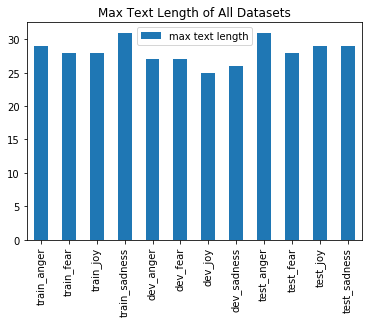

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
all_tweets_max_len.plot(kind='bar')
plt.title('Max Text Length of All Datasets')
plt.show()

In [49]:
'''
we set the length to which each tweet vector will be zero padded to.
this is based on the maximum length we got on the training set - we do not want to remove
any words as the maximun length of the training set is not very big.
'''

max_len = max(max(show_text_len(train_anger)), max(show_text_len(train_fear)), max(show_text_len(train_joy)),\
             max(show_text_len(train_sadness)))
max_len

31

# 2) Encode Text Data (Prepare Input for the Deep Learning Model)

In [50]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing .sequence import pad_sequences

Using TensorFlow backend.


In [51]:
# fit a tokenizer
def create_tokenizer(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    return tokenizer

# integer encode and pad documents                                                                                                                                 
def encode_text(tokenizer, max_length, text):
    # integer encode
    encoded = tokenizer.texts_to_sequences(text)
    # pad sequences
    padded = pad_sequences(encoded, maxlen = max_length, padding = 'post', truncating='post')
    return padded                                  


In [52]:
# create the tokenizer
# Tokenizer based on all TEXTS (the training datasets + the development datasets!!!) (not include the testing datasets！！！)
all_text = train_anger_tweets + train_fear_tweets + train_sadness_tweets + train_joy_tweets + dev_anger_tweets + dev_fear_tweets +\
dev_sadness_tweets + dev_joy_tweets

tokenizer = create_tokenizer(all_text)

# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

print('Maximum length: %d' % max_len)

# encode data
train_anger_vecs = encode_text(tokenizer, max_len, train_anger_tweets)
train_fear_vecs = encode_text(tokenizer, max_len, train_fear_tweets)
train_sadness_vecs = encode_text(tokenizer, max_len, train_sadness_tweets)
train_joy_vecs = encode_text(tokenizer, max_len, train_joy_tweets)

dev_anger_vecs = encode_text(tokenizer, max_len, dev_anger_tweets)
dev_fear_vecs = encode_text(tokenizer, max_len, dev_fear_tweets)
dev_sadness_vecs = encode_text(tokenizer, max_len, dev_sadness_tweets)
dev_joy_vecs = encode_text(tokenizer, max_len, dev_joy_tweets)

test_anger_vecs = encode_text(tokenizer, max_len, test_anger_tweets)
test_fear_vecs = encode_text(tokenizer, max_len, test_fear_tweets)
test_sadness_vecs = encode_text(tokenizer, max_len, test_sadness_tweets)
test_joy_vecs = encode_text(tokenizer, max_len, test_joy_tweets)

Vocabulary size: 11160
Maximum length: 31


In [53]:
# do a sanity check
print(train_anger_vecs)
print(np.array(train_anger_vecs.shape))

[[  51    1 1930 ...    0    0    0]
 [  16   10  635 ...    0    0    0]
 [2673  512  350 ...    0    0    0]
 ...
 [ 344   37  344 ...    0    0    0]
 [6316  109 6317 ...    0    0    0]
 [  58    1  115 ...    0    0    0]]
[857  31]


In [54]:
# save the tokenizer for later use (in case)
from pickle import dump
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

# 3) Prepare Embedding_vectors as Weights of the Deep Learning Model's Embedding Layer

In [55]:
# create a weight matrix for the Embedding layer from a loaded embedding

def get_weight_matrix(model, vocab, embedding_dim, vocab_size):
    weight_matrix = np.zeros((vocab_size,embedding_dim))
    for word, i in vocab.items():
        if i < vocab_size:
            embedding_vector = model.get(word)
            if embedding_vector is not None:
                weight_matrix[i] = embedding_vector
    return weight_matrix


In [56]:
# get vectors in the right order. vocab_size = len(tokenizer.word_index) + 1 was defined above.
embedding_vectors = get_weight_matrix(wv_model_g, tokenizer.word_index, 100, vocab_size)

# do a sanity check
pd.DataFrame(embedding_vectors)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
1,0.095152,0.370240,0.542910,0.196210,0.048205,0.320330,-0.59638,0.015868,-0.129890,-0.63028,...,0.003720,-0.225210,0.14764,-0.364170,-0.184930,0.222820,0.476260,-0.51083,0.46877,0.34882
2,0.853750,0.227740,0.694740,-0.031440,0.195410,-0.082815,0.23637,-0.082565,0.304480,-0.59252,...,-0.350830,0.309990,0.30578,-0.322530,0.113020,-0.677930,0.068984,-0.01903,0.16150,0.27763
3,-0.166970,-0.325890,-0.012003,-0.131980,-0.153610,0.165560,0.25954,0.131120,0.010092,-0.46486,...,0.184200,-0.265750,0.35818,0.306400,0.052787,-0.303180,0.029216,-0.60589,-0.21294,0.37045
4,0.193230,-0.265320,0.231040,0.599930,0.068122,0.087655,-0.50631,-0.015648,-0.028603,-0.29406,...,0.075287,0.429030,0.19632,0.186460,-0.575930,-0.235110,0.496670,-0.32829,1.13870,0.53168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
11156,-0.329960,-0.129930,0.126080,-0.082324,-0.456180,-0.958740,0.36868,-0.218680,-0.457400,-0.68920,...,0.166080,0.514600,0.50232,0.848620,0.015386,-0.007224,0.623510,0.40682,-0.18359,0.15557
11157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
11158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000


 # 4)  Save Embedding_vectors & Train Vectors & Dev. Vectors & Test Vectors

In [57]:
np.save('files/embedding_vectors/glove_embedding_vectors1.npy', embedding_vectors)
print('Embedding Vectors Saved')

Embedding Vectors Saved


In [58]:
np.save('files/train_vectors/train_anger_vecs1.npy',train_anger_vecs)
np.save('files/train_vectors/train_fear_vecs1.npy',train_fear_vecs)
np.save('files/train_vectors/train_sadness_vecs1.npy',train_sadness_vecs)
np.save('files/train_vectors/train_joy_vecs1.npy',train_joy_vecs)

print('Train Vectors Saved')

Train Vectors Saved


In [59]:
np.save('files/dev_vectors/dev_anger_vecs1.npy',dev_anger_vecs)
np.save('files/dev_vectors/dev_fear_vecs1.npy',dev_fear_vecs)
np.save('files/dev_vectors/dev_sadness_vecs1.npy',dev_sadness_vecs)
np.save('files/dev_vectors/dev_joy_vecs1.npy',dev_joy_vecs)

print('Dev Vectors Saved')

Dev Vectors Saved


In [60]:
np.save('files/test_vectors/test_anger_vecs1.npy',test_anger_vecs)
np.save('files/test_vectors/test_fear_vecs1.npy',test_fear_vecs)
np.save('files/test_vectors/test_sadness_vecs1.npy',test_sadness_vecs)
np.save('files/test_vectors/test_joy_vecs1.npy',test_joy_vecs)

print('Test Vectors Saved')

Test Vectors Saved


In [61]:
np.save('files/gold_label_vectors/train/anger1.npy',np.array(train_anger_intensities))
np.save('files/gold_label_vectors/train/fear1.npy',np.array(train_fear_intensities))
np.save('files/gold_label_vectors/train/joy1.npy',np.array(train_joy_intensities))
np.save('files/gold_label_vectors/train/sadness1.npy',np.array(train_sadness_intensities))        




np.save('files/gold_label_vectors/dev/anger1.npy',np.array(dev_anger_intensities))
np.save('files/gold_label_vectors/dev/fear1.npy',np.array(dev_fear_intensities))
np.save('files/gold_label_vectors/dev/joy1.npy',np.array(dev_joy_intensities))
np.save('files/gold_label_vectors/dev/sadness1.npy',np.array(dev_sadness_intensities))        




np.save('files/gold_label_vectors/test/anger1.npy',np.array(test_anger_intensities))
np.save('files/gold_label_vectors/test/fea1r.npy',np.array(test_fear_intensities))
np.save('files/gold_label_vectors/test/joy1.npy',np.array(test_joy_intensities))
np.save('files/gold_label_vectors/test/sadness1.npy',np.array(test_sadness_intensities))  